reference: https://www.youtube.com/watch?v=e8Yw4alG16Q

In [22]:
import numpy as np
import pandas as pd
import re
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [4]:
!head shampoo.csv

In [17]:
dataset = pd.read_csv("shampoo.csv")
month = 'Month'
dataset[month] = dataset[month].apply(lambda x: re.sub(r'^1-', '2011-', x))
dataset[month] = dataset[month].apply(lambda x: re.sub(r'^2-', '2012-', x))
dataset[month] = dataset[month].apply(lambda x: re.sub(r'^3-', '2013-', x))

In [19]:
month = 'Month'
dataset[month] = pd.to_datetime(dataset[month], format="%Y-%m")
indexed_dataset = dataset.set_index([month])

/Users/joydeepbhattacharjee/miniconda3/envs/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


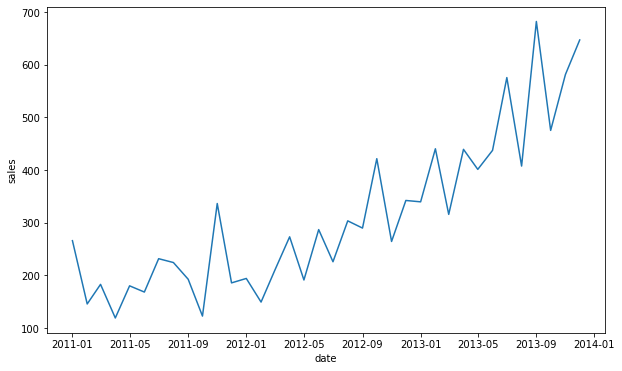

In [23]:
plt.xlabel("date")
plt.ylabel("sales")
plt.plot(indexed_dataset)

## check the stationarity

In [25]:
# determining rolling statistics

window = 4
rol_mean = indexed_dataset.rolling(window=window).mean()
rol_std = indexed_dataset.rolling(window=window).std()

print(rol_mean)
print(rol_std)

              Sales
Month              
2011-01-01      NaN
2011-02-01      NaN
2011-03-01      NaN
2011-04-01  178.575
2011-05-01  157.150
2011-06-01  162.800
2011-07-01  174.975
2011-08-01  201.275
2011-09-01  204.400
2011-10-01  193.000
2011-11-01  219.175
2011-12-01  209.525
2012-01-01  209.900
2012-02-01  216.550
2012-03-01  184.950
2012-04-01  206.800
2012-05-01  206.075
2012-06-01  240.450
2012-07-01  244.425
2012-08-01  252.000
2012-09-01  276.625
2012-10-01  310.275
2012-11-01  319.900
2012-12-01  329.575
2013-01-01  342.025
2013-02-01  346.725
2013-03-01  359.575
2013-04-01  383.825
2013-05-01  399.225
2013-06-01  398.475
2013-07-01  463.375
2013-08-01  455.450
2013-09-01  525.625
2013-10-01  535.100
2013-11-01  536.550
2013-12-01  596.375
                 Sales
Month                 
2011-01-01         NaN
2011-02-01         NaN
2011-03-01         NaN
2011-04-01   63.887368
2011-05-01   30.378227
2011-06-01   29.682093
2011-07-01   46.184657
2011-08-01   31.545351
2011-09-01

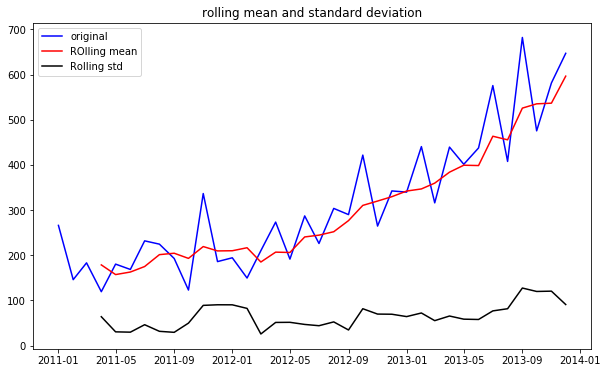

In [27]:
orig = plt.plot(indexed_dataset, color='blue', label='original')
mean = plt.plot(rol_mean, color='red', label='ROlling mean')
std = plt.plot(rol_std, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title("rolling mean and standard deviation")
plt.show(block=False)

In [29]:
indexed_dataset.columns

Index(['Sales'], dtype='object')

In [30]:
# perform dickey fuller test

from statsmodels.tsa.stattools import adfuller

print("Results of dickey fuller test")
sales = "Sales"
dftest = adfuller(indexed_dataset[sales], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=["test statistic", 'p-value', "#lags used", 'number of observations used'])
for k, v in dftest[4].items():
    dfoutput['Critical value {}'.format(k)] = v
    
print(dfoutput)

Results of dickey fuller test
test statistic                  3.060142
p-value                         1.000000
#lags used                     10.000000
number of observations used    25.000000
Critical value 1%              -3.723863
Critical value 5%              -2.986489
Critical value 10%             -2.632800
dtype: float64


### hence we can see that test statistic>Critical value 5%. hence the dataset is not stationary

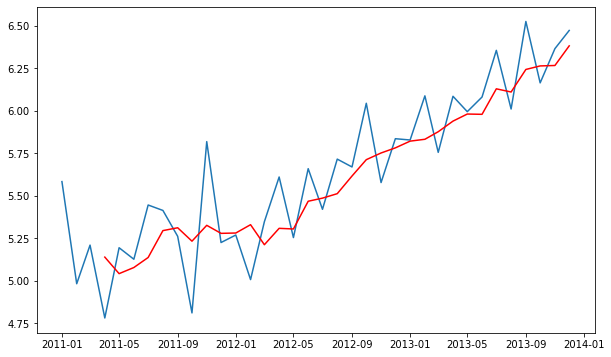

In [42]:
indexed_dataset_logscale = np.log(indexed_dataset)

moving_average = indexed_dataset_logscale.rolling(window=window).mean()
moving_std = indexed_dataset_logscale.rolling(window=window).std()
plt.plot(indexed_dataset_logscale)
plt.plot(moving_average, color='red')

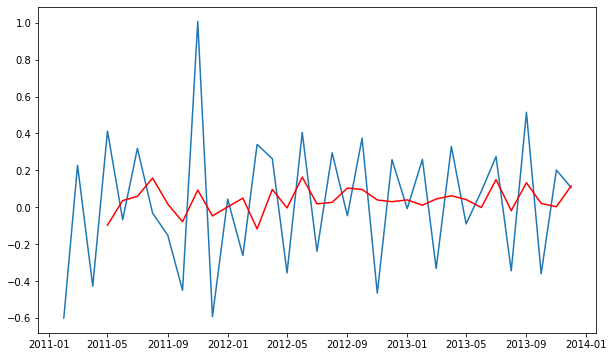

In [43]:
indexed_dataset_differencing = indexed_dataset_logscale - indexed_dataset_logscale.shift(1)

moving_average = indexed_dataset_differencing.rolling(window=window).mean()
moving_std = indexed_dataset_differencing.rolling(window=window).std()
plt.plot(indexed_dataset_differencing)
plt.plot(moving_average, color='red')

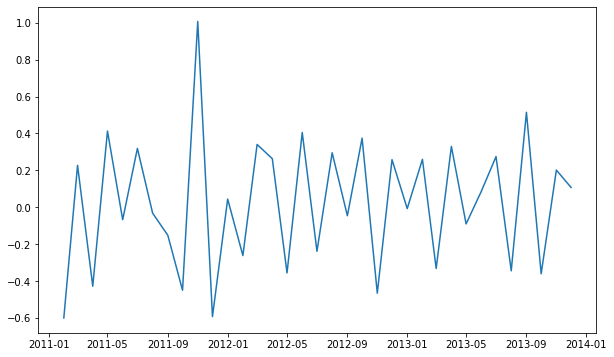

In [39]:
plt.plot(indexed_dataset_differencing)

In [49]:
# perform dickey fuller test

from statsmodels.tsa.stattools import adfuller

print("Results of dickey fuller test")
sales = "Sales"
dftest = adfuller(indexed_dataset_differencing[sales], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=["test statistic", 'p-value', "#lags used", 'number of observations used'])
for k, v in dftest[4].items():
    dfoutput['Critical value {}'.format(k)] = v
    
print(dfoutput)

Results of dickey fuller test


MissingDataError: exog contains inf or nans

In [50]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
    window = 4
    rol_mean = timeseries.rolling(window=window).mean()
    rol_std = timeseries.rolling(window=window).std()
    
    # plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='original')
    mean = plt.plot(rol_mean, color='red', label='ROlling mean')
    std = plt.plot(rol_std, color='black', label='Rolling std')
    plt.legend(loc='best')
    plt.title("rolling mean and standard deviation")
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    sales = "Sales"
    timeseries = timeseries.dropna()
    dftest = adfuller(timeseries[sales], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=["test statistic", 'p-value', "#lags used", 'number of observations used'])
    for k, v in dftest[4].items():
        dfoutput['Critical value {}'.format(k)] = v

    print(dfoutput)
    

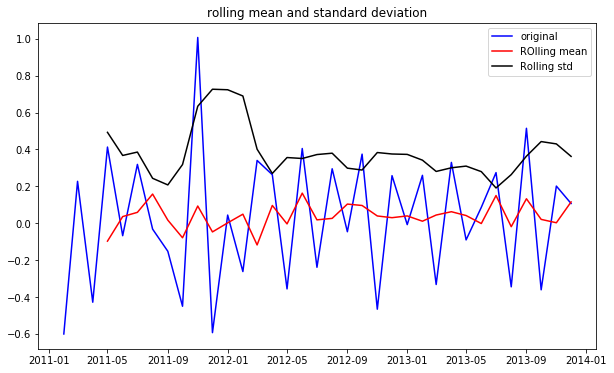

Results of dickey fuller test
test statistic                 -2.168202
p-value                         0.217988
#lags used                     10.000000
number of observations used    24.000000
Critical value 1%              -3.737709
Critical value 5%              -2.992216
Critical value 10%             -2.635747
dtype: float64


In [51]:
test_stationary(indexed_dataset_differencing)

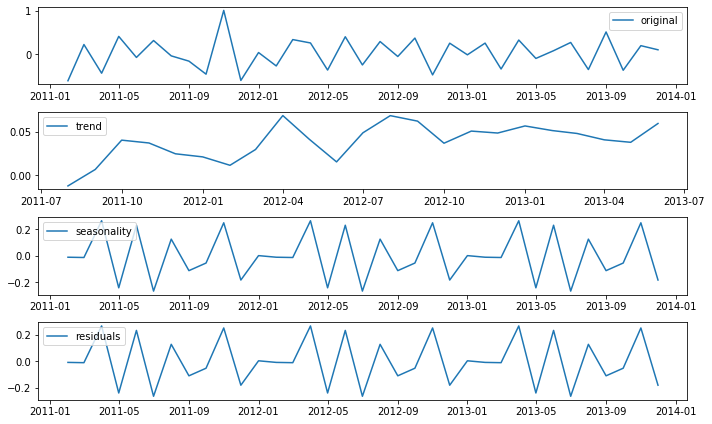

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

indexed_dataset_differencing = indexed_dataset_differencing.dropna()
decomposition = seasonal_decompose(indexed_dataset_differencing)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexed_dataset_differencing, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(seasonal, label='residuals')
plt.legend(loc='best')
plt.tight_layout()

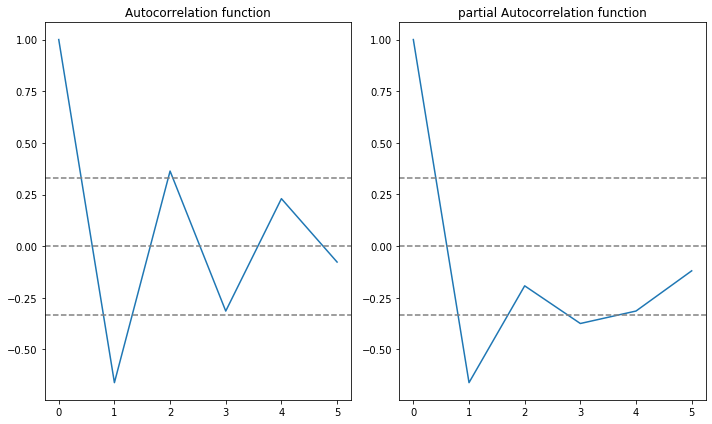

In [59]:
# acf and pacf plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexed_dataset_differencing, nlags=5)
lag_pacf = pacf(indexed_dataset_differencing, nlags=5, method='ols')

# plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexed_dataset_differencing)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexed_dataset_differencing)), linestyle='--', color='gray')
plt.title("Autocorrelation function")

# plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexed_dataset_differencing)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexed_dataset_differencing)), linestyle='--', color='gray')
plt.title("partial Autocorrelation function")
plt.tight_layout()

In [62]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexed_dataset_differencing, order=(1, 1, 1))
results_AR = model.fit(disp=-1)
plt.plot(indexed_dataset_differencing)
plt.plot(results_AR.fittedvalues, color='red')
plt.title("RSS: %.4f" % sum((results_AR.fittedvalues-indexed_dataset_differencing)**2))
print("PLotting AR model")

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.